<img src="https://www.dataiku.com/static/img/learn/guide/getting-started/getting-started-with-python/logo-stack-python.png" style="width: 700px;">
<h1 align=center style="color: #005496; font-size: 4.2em;">Machine Learning</h1>
<h2 align=center>Laboratory on Numpy / Matplotlib / Pandas / Scikit-learn</h2>

## Introduction

Python has become the de-facto standard programming language for data analytics in the past few years. Python's success is due to several factors, but one primary reason has been the availability of robust, open-source libraries for scientific computation, such as Numpy, Scipy and Matplotlib. Python is also the most popular programming language for machine learning, thanks to libraries such as Scikit-learn, TensorFlow and PyTorch.

This lecture will explore the basics of Numpy, Matplotlib and Scikit-learn. The first is a library for data manipulation through the powerful `numpy.ndarray` data structure; the second is helpful for graphical visualization and plotting; the third is a general-purpose library for machine learning, containing dozens of algorithms for classification, regression, clustering and others.

In this lecture, we assume familiarity with the Python programming language. If you are unfamiliar with the language, we advise you to look it up before going over to the next sections. Here are some useful links to learn about Python:
- https://docs.python.org/3/tutorial/introduction.html
- https://www.learnpython.org/
- http://www.scipy-lectures.org/

If you have never seen a page like this, it is a **Jupyter Notebook**. Here one can easily embed Python code and run it on the fly. You can run the code in a cell by selecting the cell and clicking the *Run* button (top). You can do the same using the **SHIFT+Enter** shortcut. You can modify the existing cells, run them, and save your changes.

## Requirements

1. Python (preferably version > 3.7): https://www.python.org/downloads/
2. Numpy, Scipy and Matplotlib: https://www.scipy.org/install.html
3. Scikit-learn: http://scikit-learn.org/stable/install.html
4. Pandas: https://pandas.pydata.org/docs/getting_started/index.html

## References

- https://docs.scipy.org/doc/numpy/
- https://docs.scipy.org/doc/scipy/reference/
- https://matplotlib.org/users/index.html
- http://scikit-learn.org/stable/documentation.html



In [205]:
import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt

We now define a couple of functions which will be useful to plot the decision function of a trained ML model

In [206]:
from utils.lib import plot_data
from utils.lib import plot_decision_surface
from utils.lib import plot_3D_decision_surface
from utils.lib import plot_svm_margin

In [207]:
# Disable warnings within the notebook
import warnings
warnings.filterwarnings('ignore')

# Scikit-learn
Let's now dive into the real **Machine Learning** part. *Scikit-learn* is the most widespread library for Machine Learning in use nowadays, and most of its fame is due to its extreme simplicity. With Scikit-learn, it is possible to manage datasets easily and train a wide range of classifiers out-of-the-box. It is also helpful for several other Machine Learning tasks, such as regression, clustering, dimensionality reduction, and model selection.

# Lecture Summary

1. Classification
    1. SVM (Linear, Feature Mapping, Kernel)
    2. Decision Tree
    3. Real Case: Glass Identification
2. K-Fold Cross Validation
3. Dimensionality Reduction
    1. PCA

## Generating a suitable dataset

We will first generate a synthetic dataset which we will use for the experiments. We will restrict ourselves to a simple case, in which each example has 2-components.

$$
\mathbf{x} = \{ x_0, x_1\} \qquad x_0, x_1 \in \mathcal{N}(0,1) \qquad \mathbf{X} = \{\mathbf{x}_i\}^{N}_{i=0} \\[1.5ex]
$$
Then, we assume that each example $\mathbf{x}$ is part of the dataset if and only if it satisfies the following condition (remember that $x^2 +y^2 = r^2$ is the equation describing a circle centered at the origin).
$$
\mathbf{x} \in \mathbf{X} \quad \Leftrightarrow \quad (x_0^2 + x_1^2) > 1 \;\; \vee \;\; (x_0^2 + x_1^2) \leq 0.25 \\[1.5ex]
$$

Lastly, we need to classify these points. We assume that the classification function has the following form:

$$
y =
\begin{cases} 
1 \quad x_0^2 + x_1^2 > 1\\
0 \quad x_0^2 + x_1^2 \leq 0.25
\end{cases}$$

We can generate a dataset and plot the correspoding results.

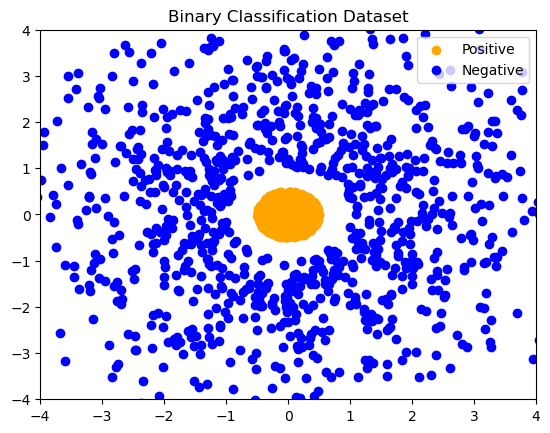

In [208]:
# Generate a synthetic dataset by using the utils.lib.generate_data function
# Plot the generated data by ysing the utils.lib.plot_data function

from utils.lib import generate_data

X, Y = generate_data(0, 2, 2000) #mean standard deviation number of points

plot_data(X, Y)


# Supervised Learning

## Support Vector Machines

In [209]:
# Perform the data splitting between train and test 

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(1600, 2) (400, 2)


## SVM with Linear Kernel

In [210]:
# Train a linear SVM and then perform inference over the test set
from sklearn.svm import SVC

model = SVC(kernel='linear')
model.fit(X_train, Y_train)

outputs = model.predict(X_test)

Great! We trained our first model. Let us evaluate the model over the test set. As a simple evaluation metric, we will use the accuracy. Remember that the accuracy metric is defined as:

$$Accuracy = \frac{TP+TN}{TP+TN+FP+FN}$$

In [211]:
# Compute the accuracy over the test set

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(Y_test, outputs)
print(accuracy)


0.58


As we can see, the performances are not that impressive. For such a simple dataset we would expect to hit more than 90% accuracy. Something is clearly wrong. Let us have a look at the shape of the learned decision function.

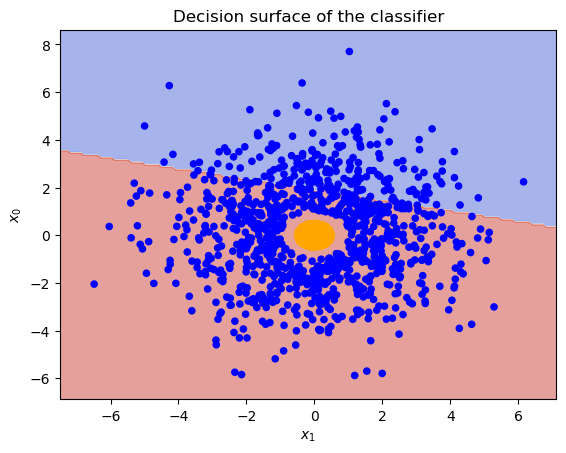

In [212]:
# Plot the decision surface of the SVM using the utils.lib.plot_decision_surface

plot_decision_surface(X, Y, model)

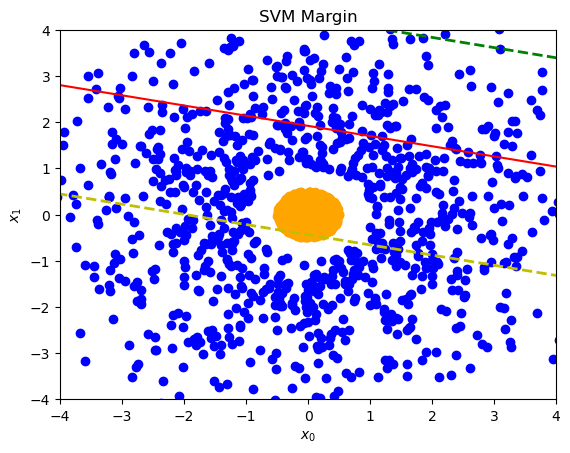

In [213]:
# Plot the margin of the SVM using the utils.lib.plot_svm_margin

plot_svm_margin(X, Y, model)

Clearly, the decision function is linear, while the data presents a non-linearity. Therefore, we need to employ a different kind of kernel to capture this feature. 

## Feature mapping
Non-linearly separable problems need a higher expressive power. We employ a homogeneus feature mapping $\phi: \mathcal{X} \rightarrow \mathcal{H}$ which maps each example $\mathbf{x} \in \mathcal{X}$ in a higher-dimensional space $\mathcal{H}$. The examples must be (approximately) linearly separable in the mapped space.

$$
    \phi : \mathbf{R}^2 \rightarrow \mathbf{R}^3\\
    \mathbf{x} = \binom{x_0}{x_1} \qquad \phi(\mathbf{x}) = \left(\begin{gather}
    x_0^2 \\
    x_0 \cdot x_1 \\
    x_1^2
  \end{gather}\right)
$$

In [214]:
# Define a function which converts a 2D example in its 3D mapping
# Create a new variable called X3d which contains the mapped dataset

def poly_mapping(X):
    return [X[0]**2, X[0]*X[1], X[1]**2]

X3d = np.array([poly_mapping(x) for x in X])

print(X3d[0])

[ 0.9868998  -0.27471134  0.07646807]


In [215]:
# Perform the train/test split and save the new dataset

X3d_train, X3d_test, Y_train, Y_test = train_test_split(X3d, Y, test_size=0.2, random_state=42)

### SVM with Linear Kernel (Feature Mapping)

In [216]:
# Train a linear SVM and perform inference with the mapped data

model = SVC(kernel='linear')
model.fit(X3d_train, Y_train)

outputs = model.predict(X3d_test)


In [217]:
# Compute the accuracy

accuracy = accuracy_score(Y_test, outputs)
print(accuracy)

1.0


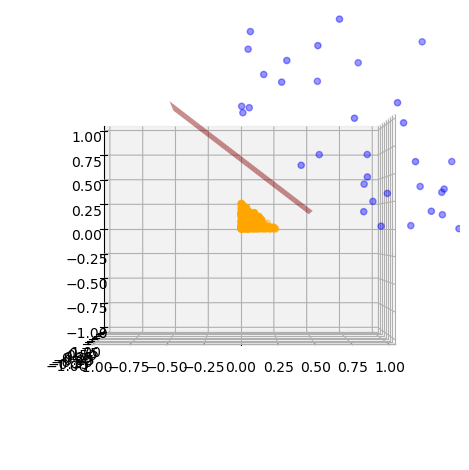

In [218]:
# Print the 3D decision surface of the SVM using utils.lib.plot_3D_decision_surface
plot_3D_decision_surface(X3d_test, Y_test, model)

## SVM with Polynomial Kernel

Devising a feature mapping $\phi$ is a nice idea. However, it can be time-consuming and expensive to compute if we are dealing with a high-dimensional polynomial mapping. We can use the **kernel trick** to avoid computing explicity the mapping.

$$
k(\mathbf{x}, \mathbf{x'}) = \phi(\mathbf{x}) \phi(\mathbf{x}') \qquad \phi: \mathcal{X} \rightarrow \mathcal{H} \quad \mathbf{x} \in \mathbb{X}
$$

If we use a kernel, then we work directly on the _input space_ rathen than a different mapping.

In [219]:
# Train an SVM by using a (homogeneous) polynomial kernel of degree 2

model = SVC(kernel='poly', degree=2)
model.fit(X_train, Y_train)

outputs = model.predict(X_test)


In [220]:
# Compute the accuracy

accuracy = accuracy_score(Y_test, outputs)
print(accuracy)


1.0


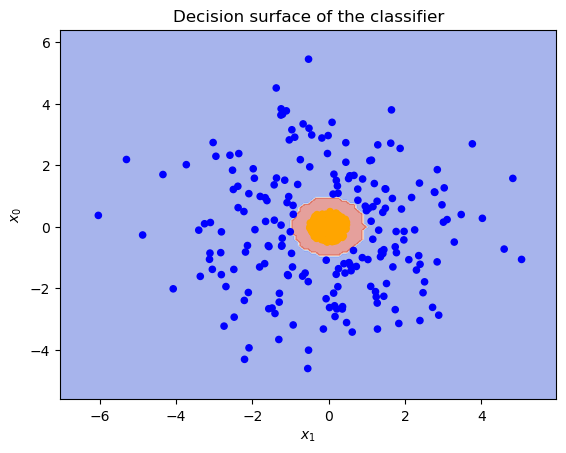

In [221]:
# Plot the decision surface of the SVM using utils.lib.plot_decision_surface

plot_decision_surface(X_test, Y_test, model)

## Decision Tree 

In [222]:
# Perform the train/test split and save the new dataset



In [223]:
# Create a decision tree classifier and train it over the data

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

# Perform inference over the test set

outputs = model.predict(X_test)

In [224]:
# Compute the accuracy

accuracy = accuracy_score(Y_test, outputs)
print(accuracy)


0.9975


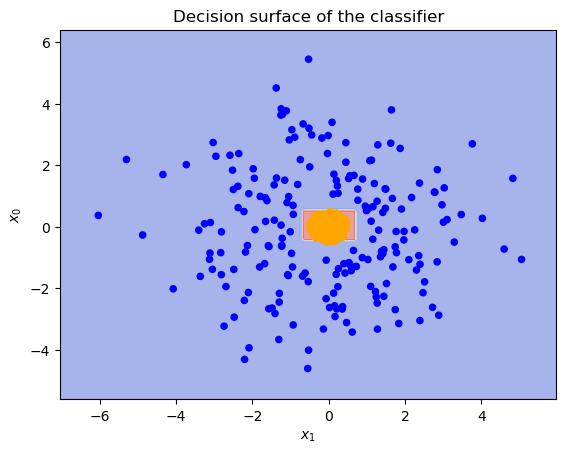

In [225]:
# Plot the decision surface

plot_decision_surface(X_test, Y_test, model)

Decision Trees are models which we can consider interpretable. It means that we can "look into" the model itself and understand how the decision function. In the case of decision trees, sklearn provides us with a nice utility to plot a trained tree to understanding the splitting rules. 

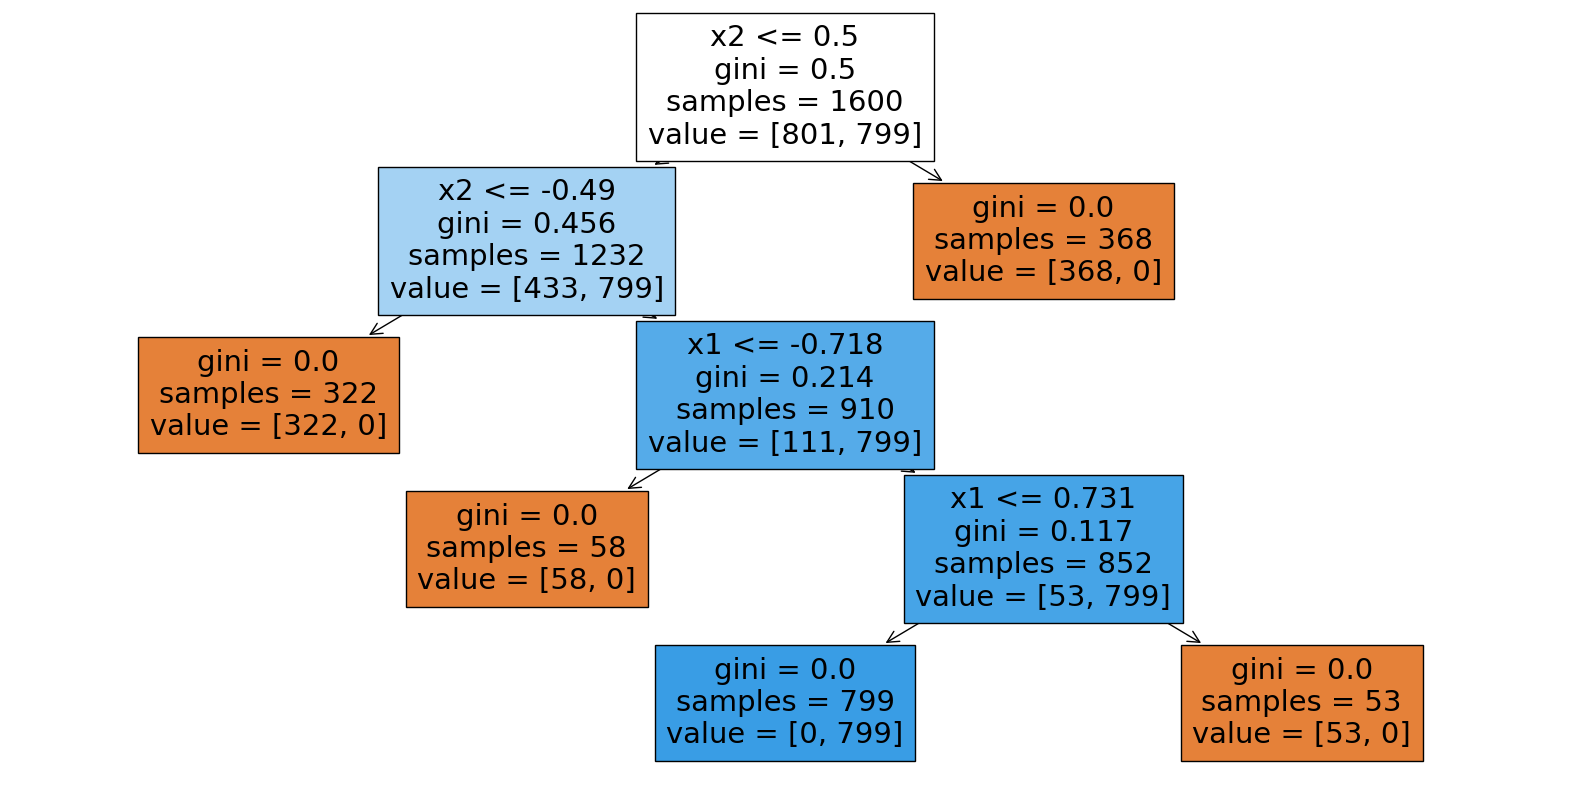

In [226]:
# Plot an interpretable version of the trained decision tree

from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=['x1', 'x2'])
plt.show()


# Real Case: Glass Identification

Let us examine a real-world dataset called "Glass Identification Dataset" [1]. It consists of 10 real-valued attributes (chemical components) and we are asked to predict the type of class of the examples (e.g., tableware, headlamp, etc.). Such analysis is extremely useful. For example, when examining evidence for a criminal trial.

In this exercise, we will transform this into a binary classification problem (one-vs-all). We want to identify if a piece of glass comes from "tableware" or not.

[1] https://archive.ics.uci.edu/ml/datasets/glass+identification

## Standard Machine Learning Workflow

1. Analyze your dataset and the task (e.g., understand data distribution, check for missing values, etc.)
1. Preprocess your dataset (e.g., input missing values, standardize, etc.)
1. Choose a suitable model (e.g., decision tree, SVM, neural network, etc.)
1. Train your model (hyperparameter tuning)
1. Evaluate your model 

In [227]:
# Import the dataset data/glass.csv using pandas
data = pd.read_csv('data/glass.csv')
# Print some information about the dataset
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,0
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,0


In [228]:
# Separate the target variable (Y) from the features X
Y = data['type']
X = data.drop(columns=['type'])
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [229]:
# Perfom the train test split over this dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=66)
X_train.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000
mean,1.518163,13.374561,2.715556,1.454211,72.700058,0.519415,8.894094,0.155439,0.057427
std,0.002917,0.808708,1.424710,0.501255,0.759171,0.712919,1.411870,0.434128,0.099151
min,1.511150,11.020000,0.000000,0.290000,69.890000,0.000000,5.430000,0.000000,0.000000
25%,1.516485,12.860000,2.220000,1.205000,72.350000,0.120000,8.225000,0.000000,0.000000
50%,1.517630,13.240000,3.480000,1.360000,72.830000,0.560000,8.560000,0.000000,0.000000
75%,1.518900,13.740000,3.600000,1.630000,73.105000,0.615000,9.100000,0.000000,0.100000
max,1.533930,17.380000,3.970000,3.500000,75.410000,6.210000,16.190000,2.200000,0.510000


In [230]:
# We standardize our data (remove the mean, divide by the std). This is done by only looking at the train set.
# We can also standardize the test set by using the mean/std coming from the train set.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
#occhio a questa cosa da fare solo nel dataset di train e poi applicare lo stesso al test
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [231]:
# Train a linear SVM and perform inference

model = SVC(kernel='linear')
model.fit(X_train, Y_train)

outputs = model.predict(X_test)

In [232]:
# Compute the accuracy
accuracy = accuracy_score(Y_test, outputs)
print(accuracy)

0.9534883720930233


Great! The accuracy of our model is very high. It is more or less what we want. However, how do we know that our model is doing well? Visual inspection is not possible anymore, since we have a higher dimensional problem. Therefore, we need to resort to additional metrics with a higher "explanatory" power.

$F_1$ is defined as the harmonic mean of the precision and recall. It is a metric which measures the test's accuracy.

$$
    \begin{gather}
    F_1 = 2 \cdot \dfrac{(precision \cdot recall)}{(precision + recall)} \\[1.5em]
    precision = \frac{TP}{TP+FP} \qquad recall = \frac{TP}{TP+FN}
    \end{gather}
$$

In [255]:
# Compute the F1 score
from sklearn.metrics import f1_score

f1 = f1_score(Y_test, outputs)
print(f1)

0.0


The $F_1$ score is really bad. Let us check more in detail what is happening with our model.

In [259]:
# Compute the precision and recall 
from sklearn.metrics import classification_report

print(classification_report(Y_test, outputs))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        41
           1       0.00      0.00      0.00         2

    accuracy                           0.95        43
   macro avg       0.48      0.50      0.49        43
weighted avg       0.91      0.95      0.93        43



This report is kind of useful, but the **confusion matrix** can give us a better picture

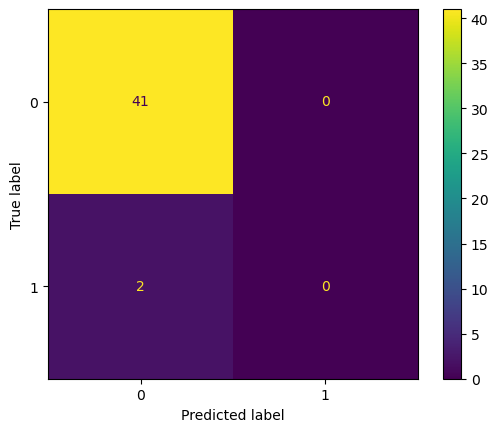

In [258]:
# Plot the confusion matrix of the classifier
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, Y_test)
plt.show()

As we can see, the model is able to predict correctly all the instances of class $0$. However, it is very bad in classifying instances of the class $1$. 

In [260]:
# Print the class predicted by the model on the test set
print(outputs)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]


In [261]:
# Compute the target class distribution in the train dataset (y_train)
Y_train.value_counts()

0    164
1      7
Name: type, dtype: int64

Recall the standard formulation of a soft-margin SVM. The regularization parameter $C$ trade-offs the data fitting with the size of the margin. In the standard case, $C$ is the same for all the classes, which means that the misclassification penalty is the same for every class.
$$
\min_{\mathbb{w}, w_0, \zeta} = ||\mathbf{w}||^2 + C \sum_{i=0}^N \zeta_i
$$

In our case, since we are dealing with an unbalanced dataset, we want to give a higher penalty if we misclassify an example coming from the minority class. Therefore, the formulation becomes:

$$
\min_{\mathbb{w}, w_0, \zeta} = ||\mathbf{w}||^2 + \sum_{i=0}^N \zeta_i \cdot (\mathbb{I}[y_i = 1]C_{1}+\mathbb{I}[y_i = 0]C_{0})
$$

where $C_{0}$ and $C_{1}$ indicates the penalties associated to the two classes. $\mathbb{I}$ is the indicator function.


In [262]:
# Train a balanced SVM and perform inference over the test set

model = SVC(kernel='linear', class_weight='balanced')
model.fit(X_train, Y_train)

outputs = model.predict(X_test)

In [264]:
# Compute the F1 score

f1 = f1_score(Y_test, outputs)
print(f1)

0.5


In [265]:
# Compute the precision and recall 

print(classification_report(Y_test, outputs))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        41
           1       0.50      0.50      0.50         2

    accuracy                           0.95        43
   macro avg       0.74      0.74      0.74        43
weighted avg       0.95      0.95      0.95        43



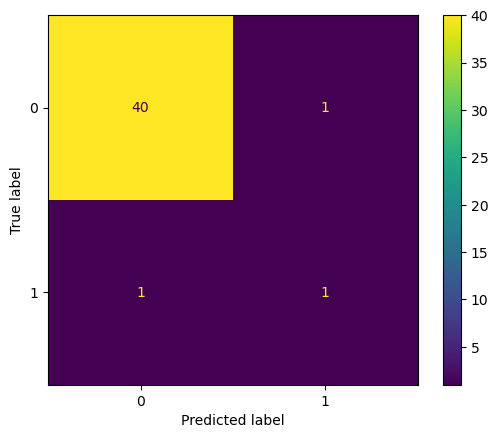

In [266]:
# Plot the confusion matrix of the classifier

plot_confusion_matrix(model, X_test, Y_test)

# K-fold Cross Validation

In real word, we do not have a separate test set we can evaluate on. We need a way to evaluate our model and obtain a reasonable estimate about its predictive quality once sent to production.

Suppose we have a dataset such as this one:
<br><br>
<img src="./img/kfold/1.png" style="width: 400px;"/>
<br><br>
<br><br>
<img src="./img/kfold/2.png" style="width: 400px;"/>
<br><br>

Generally, we use the train set to train our model. Then, we evaluate on the test set. However, in real life, we do not have a test set which is representative of the real distribution the model will have to work on once deployed.

<br><br>
<img src="img/kfold/3.png" style="width: 400px;"/>
<br><br>

What can we do? We could split again the train set and obtain a **validation set** we could use for the evaluation. Basically, we forget that the test dataset exists and we use it only at the end.  

<br><br>
<img src="img/kfold/4.png" style="width: 400px;"/>
<br><br>

<br><br>
<img src="img/kfold/5.png" style="width: 400px;"/>
<br><br>

<br><br>
<img src="img/kfold/6.png" style="width: 400px;"/>
<br><br>

However, why should we limit ourselves to a single validation dataset? We can take "multiple" validation datasets and compute an average of the performance of our model. 

<br><br>
<img src="img/kfold/7.png" style="width: 400px;"/>
<br><br>

<br><br>
<img src="img/kfold/8.png" style="width: 400px;"/>
<br><br>

<br><br>
<img src="img/kfold/9.png" style="width: 400px;"/>
<br><br>

<br><br>
<img src="img/kfold/10.png" style="width: 400px;"/>
<br><br>


In [278]:
# Perform 5-fold cross-validation on an SVM classifier.
# Use as scoring metric the F1
# Save the F1 values for each split into a list
from sklearn.model_selection import StratifiedGroupKFold, cross_val_score

model = SVC(kernel='linear', class_weight='balanced')
kf = StratifiedGroupKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(model, X_train_s, Y_train, cv=kf.split(X_train_s, Y_train))
print(scores)

[nan nan  1. nan nan]


In [279]:
# Print the k-fold scores and their mean
print(scores)
print(scores.mean())

[nan nan  1. nan nan]
nan


In [244]:
# Train an SVM model using the entire training dataset.

model = SVC(kernel='linear', class_weight='balanced')
model.fit(X_train_s, Y_train)


In [245]:
# Compute the final F1 score

outputs = model.predict(X_test_s)

<hr>

# Dimensionality Reduction

## Real Dataset: Wine Dataset

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines [1].

[1] https://archive.ics.uci.edu/ml/datasets/wine

In [284]:
# Load the Wine dataset with Pandas
data = pd.read_csv('data/wine.csv')
data

,type,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [285]:
# Separate the data into target and features
Y = data['type']
X = data.drop(columns=['type'])

In [289]:
# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [294]:
# Initialize a PCA object and transform the data
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


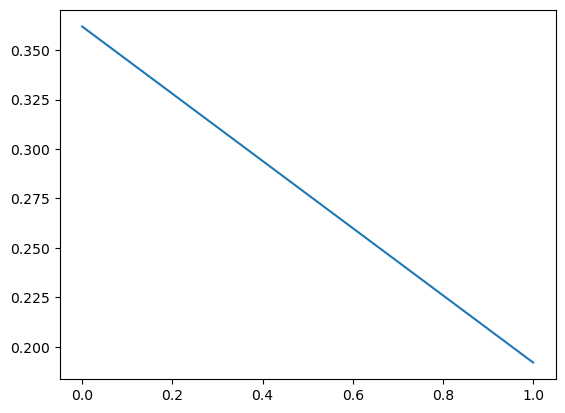

In [295]:
# Plot the explained variace ratio for each component
plt.plot(pca.explained_variance_ratio_)

As we did with the K-means example, the point of inflexion (where the line starts to bend) should indicate how many components have to be retained. In this case, the magic number is 3

### PCA (2-dimensions)

In [300]:
# Initialize a PCA object (2 components) and transform data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


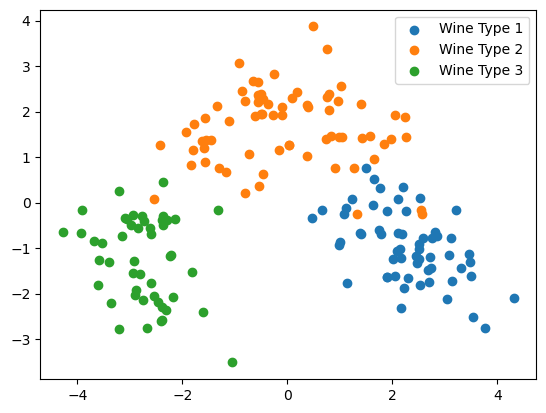

In [301]:
# Plot the data by using the utils.lib.plot_pca_clusters function
from utils.lib import plot_pca_clusters
plot_pca_clusters(X_pca, Y)

### PCA (3-dimensions)

In [302]:
# Initialize a PCA object (3 components) and transform data
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)


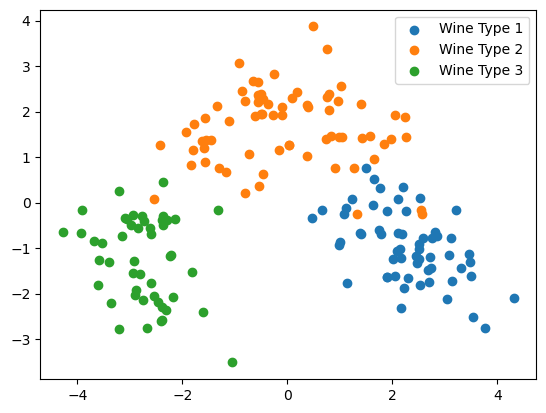

In [303]:
# Plot the data by using the utils.lib.plot_pca_clusters function
from utils.lib import plot_pca_clusters
plot_pca_clusters(X_pca, Y)